In [2]:
#loading libraries
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
from tqdm import tqdm 

In [3]:
# loading files
filename = 'car_horn.wav'

In [4]:
data, sample_rate = librosa.load(filename)

In [5]:
data

array([ 6.2847943e-03,  1.2413975e-02,  1.0996618e-02, ...,
        6.9263278e-06, -9.3831368e-06,  0.0000000e+00], dtype=float32)

In [6]:
sample_rate

22050

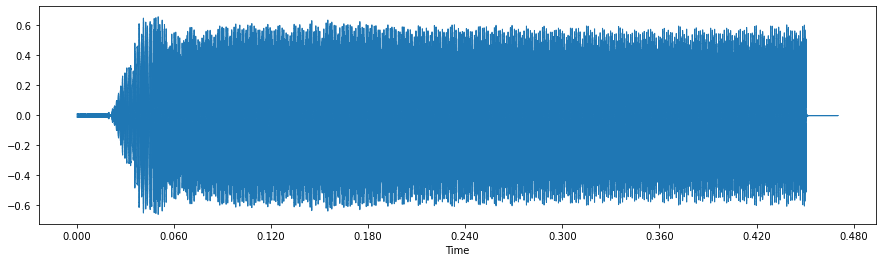

In [7]:
# visualizing the one sample wav file
plt.figure(figsize=(15,4))
librosa.display.waveshow(data, sr = sample_rate)
ipd.Audio(filename)

In [8]:
# looking the metadata
import pandas as pd
df_metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [9]:
df_metadata.head(15)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [20]:
# looking the nature of data
df_metadata.value_counts('class')

class
air_conditioner     1000
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
jackhammer          1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
dtype: int64

In [11]:
df_metadata.value_counts('classID')

classID
0    1000
2    1000
3    1000
4    1000
5    1000
7    1000
9    1000
8     929
1     429
6     374
dtype: int64

In [12]:
# heavy techniques for audio signal processing
# MFCC -> Mel-Frequency Cepstral Coefficient
# Mcc summarises the frequency distribution  across the window size, making it possible to analyse both the time and frequency
# characteristics of the sound.
# this kind of representation will enable is to identify features for classification

In [13]:
mfccs = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc = 40)

In [14]:
print(mfccs)

[[-3.61698181e+02 -1.60100601e+02 -6.32874260e+01 -5.25493813e+01
  -6.91495667e+01 -7.35486069e+01 -6.82636185e+01 -6.40102997e+01
  -7.13589096e+01 -7.85781250e+01 -7.38511276e+01 -7.67658005e+01
  -8.05307922e+01 -8.09656906e+01 -8.20076599e+01 -8.37446365e+01
  -7.73865433e+01 -7.57403107e+01 -6.80439682e+01 -4.25921936e+01
  -8.78815918e+01]
 [ 1.36482773e+02  1.14998734e+02  9.50331268e+01  8.26775665e+01
   7.06999207e+01  6.88475418e+01  6.77031174e+01  6.66205750e+01
   6.52879791e+01  6.42875824e+01  6.68735886e+01  6.42056580e+01
   6.21530914e+01  6.23777466e+01  6.26290359e+01  6.43814774e+01
   6.72558823e+01  6.56606445e+01  7.11815948e+01  8.12005768e+01
   8.50727997e+01]
 [ 2.29341507e+01 -2.53801212e+01 -3.26081581e+01 -3.31476212e+01
  -3.28489723e+01 -2.97150688e+01 -2.84359283e+01 -3.11333618e+01
  -3.04308014e+01 -3.04246941e+01 -3.12584038e+01 -3.04644165e+01
  -3.05035439e+01 -3.01163883e+01 -3.00769405e+01 -2.61907539e+01
  -2.62333794e+01 -3.08137569e+01 -2.7

In [15]:
# the above output signify that these are the patters that are calculated based on frequenct and time feature from the audio
# this will uniquely identify the specific audio that we've selected
print( mfccs.shape)

(40, 21)


In [16]:
# till now we've extracted characteristics of only single audio file 
# Now we will calculate the mfccs of each and every wav file that we have in our parent folder
audio_dataset_path = 'UrbanSound8K/audio/'
df_metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [17]:
audio_dataset_path, df_metadata.head(3)

('UrbanSound8K/audio/',
       slice_file_name    fsID  start        end  salience  fold  classID  \
 0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
 1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
 2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
 
               class  
 0          dog_bark  
 1  children_playing  
 2  children_playing  )

In [18]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [23]:
import os
import numpy as np
extracted_features=[]
for index_num,row in tqdm(df_metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [02:52, 20.18it/s]/Users/bikashpokharel/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [06:29, 30.17it/s]/Users/bikashpokharel/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/Users/bikashpokharel/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [06:47, 21.42it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

In [ ]:
y

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train, X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
# model creation
